#### Clustering-1.pptx

In [143]:
#simple example
import numpy as np
X = np.arange(1,11,1)
X = np.reshape(X, (-1,1))

In [144]:
#K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=123457).fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [145]:
kmeans.cluster_centers_

array([[ 3.],
       [ 8.]])

In [146]:
#Sum of distances of samples to their closest cluster center.
kmeans.inertia_

20.0

In [147]:
#the total SS
tot_SS = 0
for i in range(0,10):
    tot_SS += np.square(X[i][0]-np.mean(X))
tot_SS

82.5

In [148]:
# The within SS are 10 for each cluster
w_1=0
w_2=0
for i in range(0,5):
    w_1 += np.square(X[i][0]-np.mean(X[0:5]))
for i in range(5,10):
    w_2 += np.square(X[i][0]-np.mean(X[5:10]))

In [149]:
w_1

10.0

In [150]:
w_2

10.0

In [151]:
# The between SS (Cluster means are 3 and 8 and total mean is 5.5)
# These need to be weighted by # observation
bet_SS = 5*np.square(3-5.5)+5*np.square(8-5.5)
bet_SS

62.5

In [152]:
(bet_SS/tot_SS)*100

75.757575757575751

In [153]:
# Now consider what happens when clusters are far away
Y1 = np.arange(1,6,1)
Y2 = np.arange(11,16,1)
Y = np.append(Y1,Y2)
Y = np.reshape(Y, (-1,1))
Y

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [11],
       [12],
       [13],
       [14],
       [15]])

In [154]:
#K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=123457).fit(Y)
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [155]:
kmeans.cluster_centers_

array([[  3.],
       [ 13.]])

In [156]:
#Sum of distances of samples to their closest cluster center.
kmeans.inertia_

20.0

In [157]:
#the total SS
tot_SS = 0
for i in range(0,10):
    tot_SS += np.square(Y[i][0]-np.mean(Y))
tot_SS

270.0

In [158]:
# The within SS are 10 for each cluster
w_1=0
w_2=0

w_1 = np.sum((Y[0:5]-Y[0:5].mean(0))**2)
for i in range(5,10):
    w_2 += np.square(Y[i][0]-np.mean(Y[5:10]))

In [159]:
w_1

10.0

In [160]:
w_2

10.0

In [161]:
# The between SS (Cluster means are 3 and 13 and total mean is 8)
# These need to be weighted by # observation
bet_SS = 5*np.square(3-8)+5*np.square(13-8)
bet_SS

250

In [162]:
(bet_SS/tot_SS)*100

92.592592592592595

##### Wine Dataset

In [168]:
import pandas as pd
#Loading Dataset in DataFrame
Wine = pd.DataFrame.from_csv("C:\\Users\\Jayant\\Desktop\\DMPA\\PythonSlides\\Wine.csv", index_col=None)
Wine.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [169]:
#Normalizing the data
from sklearn import preprocessing
Wine_scaled_X = preprocessing.scale(Wine.ix[:,1:])
Wine_scaled_X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ..., 
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [170]:
#K-means
np.random.seed(12345)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, n_init=20).fit(Wine_scaled_X)
kmeans.labels_

array([0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       4, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 4, 4, 7, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 3, 1, 7, 2, 3, 4, 7, 7, 1,
       5, 1, 4, 2, 4, 2, 7, 7, 1, 5, 2, 7, 2, 3, 1, 2, 7, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 5, 4, 7, 2, 2, 7, 7, 2, 7, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 1, 2, 2, 4, 4, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6,
       1, 1, 1, 6, 1, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6])

In [171]:
kmeans.cluster_centers_

array([[  1.07821373e+00,  -3.61641600e-01,   1.66892116e-01,
         -8.95419921e-01,   4.62320719e-01,   9.87692196e-01,
          1.05969987e+00,  -6.73576690e-01,   6.88593885e-01,
          3.60705678e-01,   4.27987357e-01,   7.92886194e-01,
          1.33678887e+00],
       [ -9.42905705e-02,   6.44786539e-01,  -7.60404787e-02,
          2.28876932e-01,  -1.44850234e-01,  -1.10865011e+00,
         -1.22518185e+00,   8.13864280e-01,  -1.15795043e+00,
         -3.51697425e-02,  -7.41551793e-01,  -1.16260141e+00,
         -4.65847219e-01],
       [ -8.64170981e-01,   9.08775248e-02,  -5.14141190e-01,
          2.17930582e-01,  -6.13775045e-01,   4.21122654e-01,
          4.06820464e-01,  -4.62285793e-01,   4.61821137e-01,
         -8.97576846e-01,  -2.66317070e-02,   6.41985632e-01,
         -7.49882883e-01],
       [ -1.22948869e+00,  -6.20333884e-01,   2.64305549e-01,
          7.20435894e-01,  -8.57456639e-01,  -5.99169272e-01,
         -2.92188821e-01,   1.11315422e+00,  -3.437

In [172]:
#Sum of distances of samples to their closest cluster center.
kmeans.inertia_

935.96718088550733

In [175]:
pd.crosstab(Wine["Type"],kmeans.labels_, rownames=["Type"], colnames=["Cluster"])

Cluster,0,1,2,3,4,5,6,7
Type,,,,,,,,
A,46,0,2,0,10,0,0,1
B,0,6,27,17,6,3,0,12
C,0,22,0,0,0,0,26,0


##### Hierarchichal Clustering

In [241]:
import pandas as pd
#Loading Dataset in DataFrame
Uni = pd.DataFrame.from_csv("C:\\Users\\Jayant\\Desktop\\DMPA\\PythonSlides\\Universities.csv", index_col=None)
Uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [242]:
#Normalizing the data
from sklearn import preprocessing
Uni_scaled_X = preprocessing.scale(Uni.ix[:,1:])
Uni_scaled_X

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [243]:
#hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# generate the linkage matrix
Z_complete = linkage(Uni_scaled_X, 'complete')
Z_average = linkage(Uni_scaled_X, 'average')
Z_single = linkage(Uni_scaled_X, 'single')
Z_centroid = linkage(Uni_scaled_X, 'centroid')

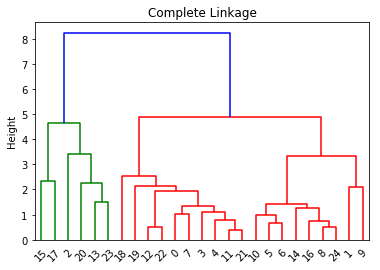

In [244]:
#plot dendograms
from matplotlib import pyplot as plt
dendrogram(Z_complete)
plt.ylabel('Height')
plt.title('Complete Linkage')
plt.show()

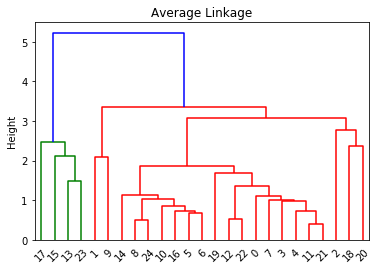

In [245]:
#plot dendograms
from matplotlib import pyplot as plt
dendrogram(Z_average)
plt.ylabel('Height')
plt.title('Average Linkage')
plt.show()

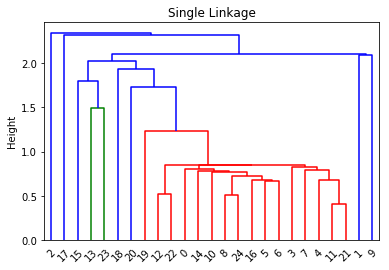

In [246]:
#plot dendograms
from matplotlib import pyplot as plt
dendrogram(Z_single)
plt.ylabel('Height')
plt.title('Single Linkage')
plt.show()

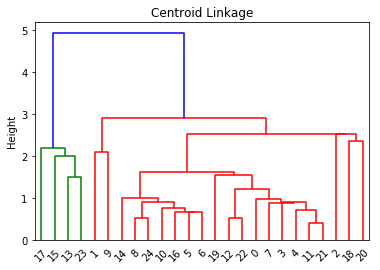

In [247]:
#plot dendograms
from matplotlib import pyplot as plt
dendrogram(Z_centroid)
plt.ylabel('Height')
plt.title('Centroid Linkage')
plt.show()

In [248]:
#Identifying Clusters
from scipy.cluster.hierarchy import cut_tree
cut_tree(Z_complete, 4)

array([[0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [2],
       [1],
       [3],
       [1],
       [3],
       [0],
       [0],
       [2],
       [0],
       [0],
       [2],
       [1]])

In [249]:
cut_tree(Z_average, 4)

array([[0],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [3],
       [0],
       [3],
       [0],
       [3],
       [2],
       [0],
       [2],
       [0],
       [0],
       [3],
       [0]])

In [250]:
cut_tree(Z_single, 4)

array([[0],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [251]:
cut_tree(Z_centroid, 4)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [3],
       [0],
       [3],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0]])

In [252]:
#Identifying Clusters
df_Z_complete = pd.DataFrame(cut_tree(Z_complete, 4), columns=['Z_complete'])
df_Z_average = pd.DataFrame(cut_tree(Z_average, 4), columns=['Z_average'])
df_Z_single = pd.DataFrame(cut_tree(Z_single, 4), columns=['Z_single'])
df_Z_centroid = pd.DataFrame(cut_tree(Z_centroid, 4), columns=['Z_centroid'])
df_uni = pd.DataFrame(Uni['Univ'], columns=['Univ'])
pd.concat([df_uni,df_Z_complete,df_Z_average,df_Z_single,df_Z_centroid], axis=1)

,Univ,Z_complete,Z_average,Z_single,Z_centroid
0,Brown,0,0,0,0
1,CalTech,1,1,1,1
2,CMU,2,2,2,0
3,Columbia,0,0,0,0
4,Cornell,0,0,0,0
5,Dartmouth,1,0,0,0
6,Duke,1,0,0,0
7,Georgetown,0,0,0,0
8,Harvard,1,0,0,0
9,JohnsHopkins,1,1,1,1
